In [3]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time
import pickle
from sklearn.decomposition import PCA
from scipy.spatial import procrustes
from sklearn.manifold import MDS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
 # load american gut data
data_pickle = pickle.load(open("/Users/david/Dropbox/ARGAN/python/AG/AG.p","rb"))
counts = data_pickle[0]
counts_norm = counts / np.sum(counts, axis=1, keepdims=True)
counts_norm = np.sqrt(counts_norm)
counts_norm = counts_norm / np.max(counts_norm)
counts_norm = (counts_norm * 2) - 1

In [29]:
# PCA with SVD
data, X_mu, U = AAnet.AAnet.pcasvd([],counts_norm, 100)
data.shape

(9810, 100)

In [30]:
_,idx = np.unique(data_pickle[2], return_inverse=True)

In [31]:
# AAnet params
num_at = 4
noise_z_std = 0.05
z_dim = [256,128,64,32]
#z_dim = [] # linear AA
act_out = tf.nn.tanh
#act_out = None # linear last layer
input_dim = data.shape[1]

In [32]:
# AAnet
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

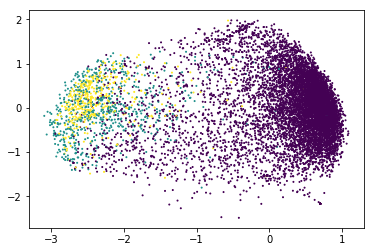

In [33]:
# plot PCA
plt.scatter(data[:,0], data[:,1], s=1, c=idx)
plt.show()

In [15]:
# train
model.train(data, batch_size=128, num_batches=5000)

Iter [       0] Time [0.3433] loss [0.4766]
Iter [     500] Time [2.0570] loss [0.0173]
Iter [    1000] Time [3.8651] loss [0.0157]
Iter [    1500] Time [5.4319] loss [0.0139]
Iter [    2000] Time [7.2766] loss [0.0142]
Iter [    2500] Time [9.4796] loss [0.0134]
Iter [    3000] Time [11.2523] loss [0.0136]
Iter [    3500] Time [12.9919] loss [0.0141]
Iter [    4000] Time [14.8411] loss [0.0134]
Iter [    4500] Time [16.8520] loss [0.0135]
Iter [    4999] Time [18.4939] loss [0.0142]
done.


In [16]:
# loss on all data
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.0132


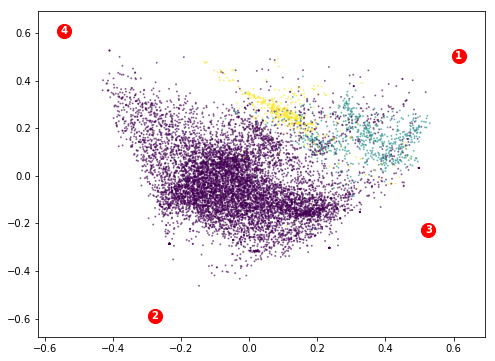

In [17]:
model.plot_at_pca_single(data, c=idx)

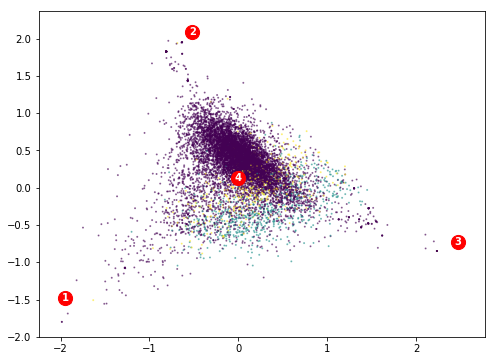

In [18]:
model.plot_pca_ats_data(data, c=idx)

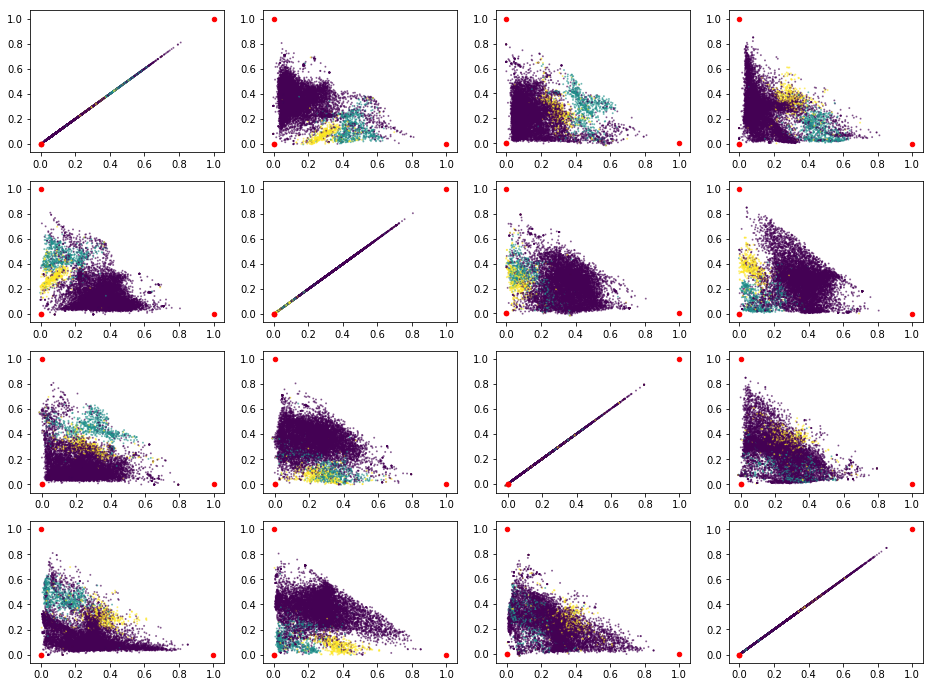

In [22]:
model.plot_at(data, c=idx)

In [25]:
# get ATs
ats_x = model.get_ats_x()
print(ats_x.shape)
# project back from PCA to input space
ats_x_orig = ats_x @ U.T + X_mu;
print(ats_x_orig.shape)

(4, 100)
(4, 2007)
